<a href="https://colab.research.google.com/github/Stebo5/MLZaliczenie1/blob/main/WeatherHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
df = pd.read_csv('weather.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [131]:
# Usuwanie niepotrzebnych zmiennych
df = df.drop(['RainToday', 'RISK_MM', 'Location', 'Date'], axis=1)
# Zakodowanie zmiennej celu
df['RainTomorrow'] = (df['RainTomorrow'] == 'Yes').astype(int)

<Axes: >

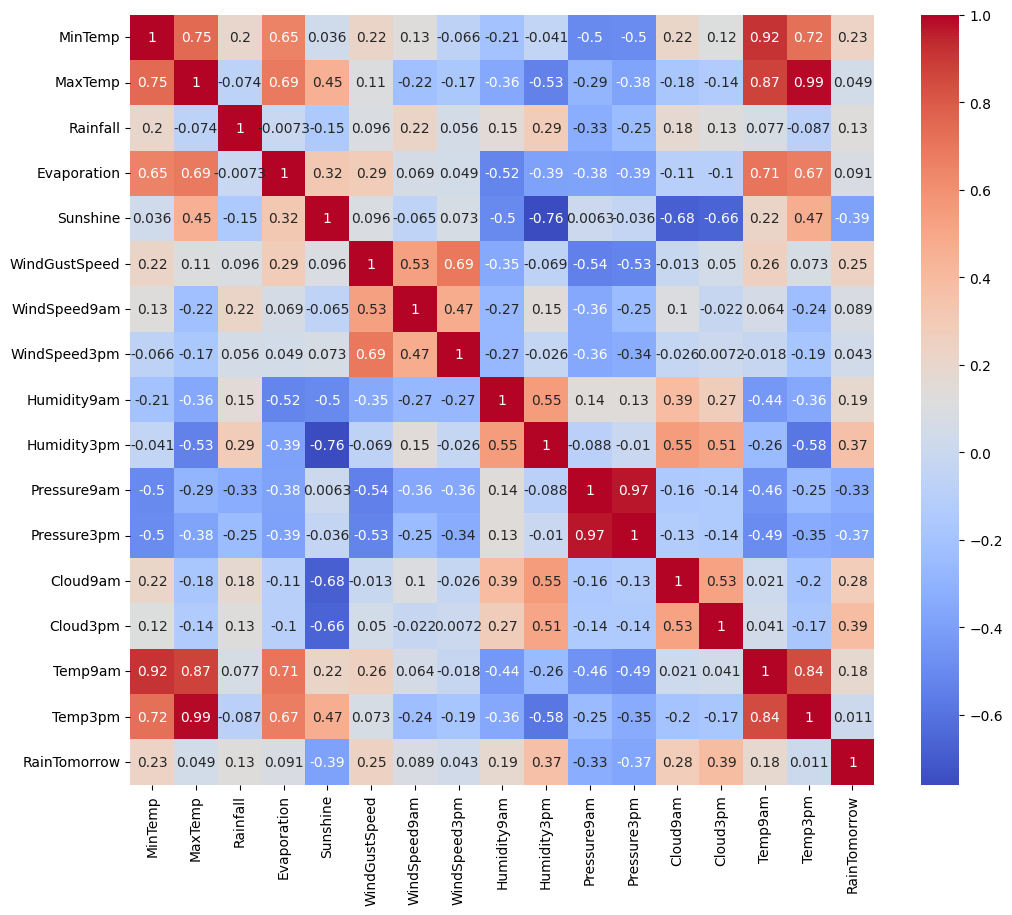

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
# Stworzenie macierzy korelacji
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [133]:
# Usunicie silnie skorelowanych zmiennych
df = df.drop(['Temp9am', 'Temp3pm'], axis=1)

In [134]:
# Brakujące wartości w kolumnach
df.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
RainTomorrow      0
dtype: int64

In [135]:
def fill_numeric(cols: list[str]):
  for col in cols:
    df[col].fillna(df[col].mean(), inplace=True)

def fill_categorical(cols: list[str]):
  for col in cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Uzupełninie zmiennych numerycznych średnią a kategorycznych modą
fill_numeric(['Sunshine', 'WindGustSpeed', 'WindSpeed9am'])
fill_categorical(['WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [136]:
df.isna().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
RainTomorrow     False
dtype: bool

In [137]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,1
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,1
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,1
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,1
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,0


In [138]:
# Zakodowanie zmiennych kategorycznych
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [139]:
# Rozdzielenie zmiennej celu
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [140]:
from sklearn.model_selection import train_test_split
# Podział na zbiory testowe i treningowe
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [141]:
# Dni deszczowe mają znaczną przewagę
yes_rain = (df['RainTomorrow'] == 0).sum()
no_rain = (df['RainTomorrow'] == 1).sum()
f'{yes_rain} / {no_rain}'

'300 / 66'

In [142]:
# Zbalansowanie przy użyciu SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [143]:
from sklearn.ensemble import RandomForestClassifier
# Predykcja przy użyciu RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score, classification_report
def report(name: str, y_test, y_pred):
  print(f'Dokładność {name}: ', accuracy_score(y_test, y_pred))
  print(f'Raport {name}: ')
  print(classification_report(y_test, y_pred))

In [145]:
report('RandomForestClassifier', y_test, y_pred_rf)

Dokładność RandomForestClassifier:  0.8478260869565217
Raport RandomForestClassifier: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        77
           1       0.53      0.60      0.56        15

    accuracy                           0.85        92
   macro avg       0.72      0.75      0.74        92
weighted avg       0.86      0.85      0.85        92



In [146]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(title: str, y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(cm).plot()
  plt.title(title)

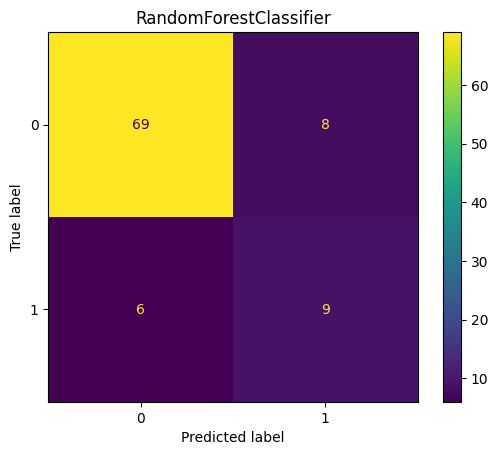

In [147]:
plot_confusion_matrix('RandomForestClassifier', y_test, y_pred_rf)

In [148]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
def plot_roc_curve(title: str, y_test, y_pred):
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
  plt.title(title)

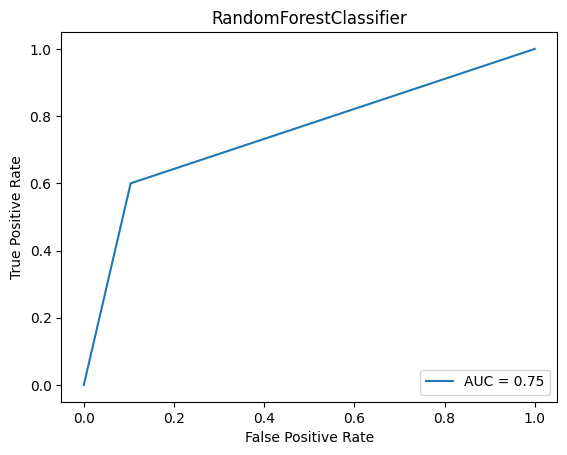

In [149]:
plot_roc_curve('RandomForestClassifier', y_test, y_pred_rf)

In [150]:
from sklearn.preprocessing import StandardScaler
# Przeskalowanie danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [151]:
from sklearn.linear_model import LogisticRegression
# Predykcja przy użyciu LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [152]:
report('LogisticRegression', y_test, y_pred_lr)

Dokładność LogisticRegression:  0.8804347826086957
Raport LogisticRegression: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        77
           1       0.67      0.53      0.59        15

    accuracy                           0.88        92
   macro avg       0.79      0.74      0.76        92
weighted avg       0.87      0.88      0.87        92



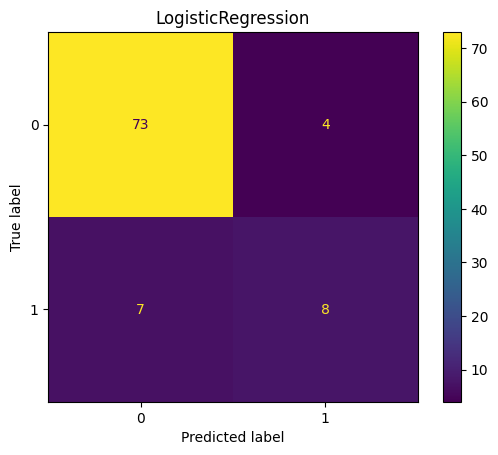

In [153]:
plot_confusion_matrix('LogisticRegression', y_test, y_pred_lr)

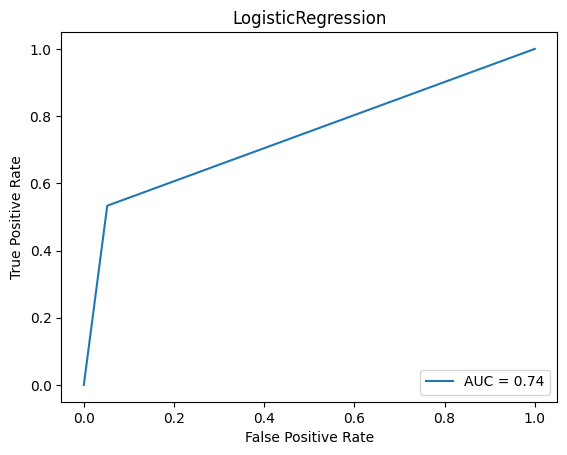

In [154]:
plot_roc_curve('LogisticRegression', y_test, y_pred_lr)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
# Predykcja przy użyciu KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)

In [156]:
report('KNeighborsClassifier', y_test, y_pred_knc)

Dokładność KNeighborsClassifier:  0.75
Raport KNeighborsClassifier: 
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        77
           1       0.30      0.40      0.34        15

    accuracy                           0.75        92
   macro avg       0.59      0.61      0.59        92
weighted avg       0.78      0.75      0.76        92



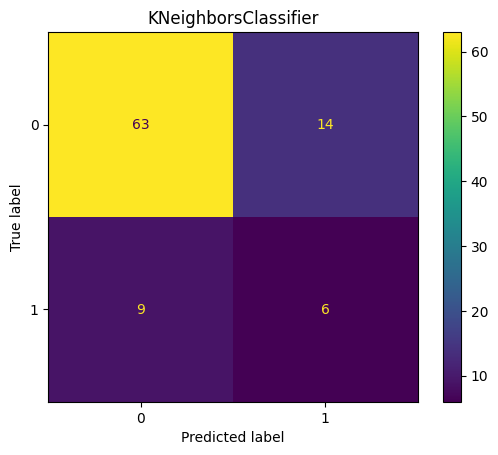

In [157]:
plot_confusion_matrix('KNeighborsClassifier', y_test, y_pred_knc)

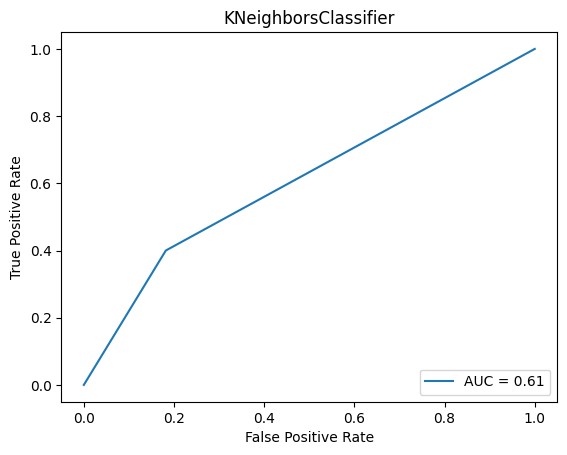

In [158]:
plot_roc_curve('KNeighborsClassifier', y_test, y_pred_knc)

In [159]:
# Próba osiągnięcia większej dokładności poprzez dostosowanie parametru n_neighbors
for n_neighbors in range(2,11):
  knc = KNeighborsClassifier(n_neighbors=n_neighbors)
  knc.fit(X_train, y_train)
  y_pred_knc = knc.predict(X_test)
  score = accuracy_score(y_test, y_pred_knc)
  print(n_neighbors, score)

2 0.8586956521739131
3 0.7608695652173914
4 0.8152173913043478
5 0.75
6 0.782608695652174
7 0.6956521739130435
8 0.7391304347826086
9 0.5543478260869565
10 0.5869565217391305
